1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [71]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

n = 1000
x1 = np.random.normal(loc=0,scale=1,size=n)
x2 = x1 + np.random.normal(loc=0,scale=3,size=n)
x3 = 2*x1 + x2

A = np.array([x1,x2,x3]).T #rows = number of observations (n), columns = number of features (3)
#A = np.array([x1,x2]).T #rows = number of observations (n), columns = number of features (3)

#let's scale the data subtracting its mean along the first axis (rows of each column)
#A = A - A.mean(axis = 0, keepdims = True)
#print("scaled data:",A)

print("A shape:",A.shape)

C = np.cov(A.T)
print("\nCovariance matrix:\n", C, '\n')

print("\nEIGENDECOMPOSITION OF THE COVARIANCE MATRIX:\n")

# now find the eigenvectors of the covariance matrix
l, V = la.eig(C)
# take only the real component, if possible
l = np.real_if_close(l)
Lambda = np.diag(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

decreasing_order = np.argsort(l)[::-1] #return the indeces that would sort the eigenvalues array
l = l[decreasing_order]
V = V[:, decreasing_order] #sort the eigenvectors according to the eigenvalues

print("Eigenvalues sorted:\n",l,"\n")
print("Eigenvectors sorted:\n",V,"\n")

#print("are eigenvectors orthogonal to each other?",(np.allclose(np.dot(V[:,0],V[:,1]),0),np.allclose(np.dot(V[:,1],V[:,2]),0),np.allclose(np.dot(V[:,0],V[:,2]),0)))
res = np.dot(V[:,0],V[:,1])
print("\nSVD ON THE COVARIANCE MATRIX:\n")

# perform the SVD
U, S, Vt = la.svd(C)

print("shapes: U =", U.shape, "D:", S.shape, "V^T:", Vt.shape, '\n')
print("Spectrum:\n", S, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')

#let's calculate the explained variances for every principal component
explained_variances = []
for li in l:
    explained_variances.append(li/Lambda.trace())
print("Total variability retained for each principal component respectively (%):\n",*(np.dot(explained_variances,100)),"\n")

print("Projecing data to 1st and 2nd pc results on retaining ",(explained_variances[0] + explained_variances[1]) ,"% of total variability")
print("Projecing data to 2nd and 3rd pc results on retaining ",(explained_variances[1] + explained_variances[2]) ,"% of total variability")
print("Projecing data to 1st and 3rd pc results on retaining ",(explained_variances[0] + explained_variances[2]) ,"% of total variability")


A shape: (1000, 3)

Covariance matrix:
 [[ 0.9774406   0.86985997  2.82474117]
 [ 0.86985997  9.10336888 10.84308883]
 [ 2.82474117 10.84308883 16.49257116]] 


EIGENDECOMPOSITION OF THE COVARIANCE MATRIX:

Eigenvalues:
 [ 2.45866047e+01 -5.58014656e-16  1.98677599e+00] 

Eigenvectors:
 [[-0.11809407 -0.81649658  0.56514345]
 [-0.57406248 -0.40824829 -0.70977856]
 [-0.81025062  0.40824829  0.42050835]] 

Eigenvalues sorted:
 [ 2.45866047e+01  1.98677599e+00 -5.58014656e-16] 

Eigenvectors sorted:
 [[-0.11809407  0.56514345 -0.81649658]
 [-0.57406248 -0.70977856 -0.40824829]
 [-0.81025062  0.42050835  0.40824829]] 


SVD ON THE COVARIANCE MATRIX:

shapes: U = (3, 3) D: (3,) V^T: (3, 3) 

Spectrum:
 [2.45866047e+01 1.98677599e+00 1.32058490e-15] 

U:
 [[-0.11809407  0.56514345 -0.81649658]
 [-0.57406248 -0.70977856 -0.40824829]
 [-0.81025062  0.42050835  0.40824829]] 

V^T:
 [[-0.11809407 -0.57406248 -0.81025062]
 [ 0.56514345 -0.70977856  0.42050835]
 [-0.81649658 -0.40824829  0.4082482

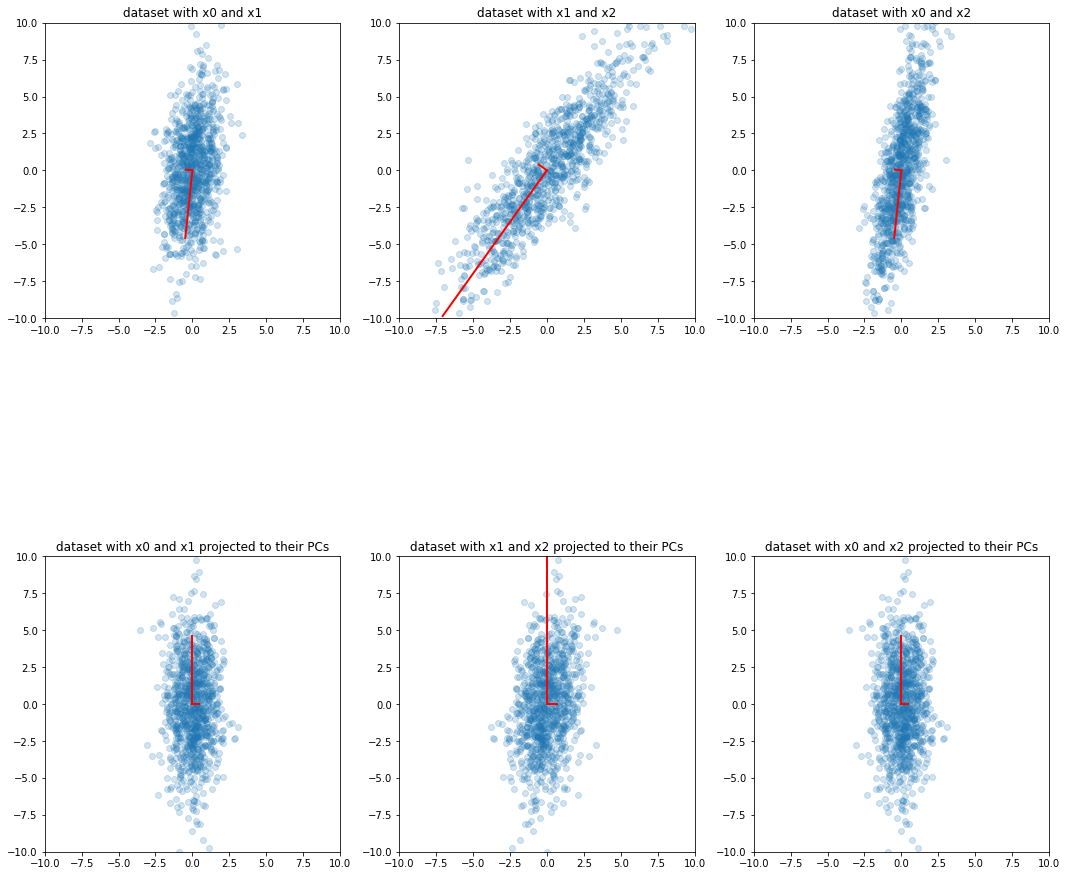

In [72]:
#calculating covariance matrixes and their eigenvectors/eigenvalues for all the dimension pairs

A12 = A[:,0:2] #taking different column pairs from original data
A23 = A[:,1:3]
A13 = A[:,0:-1]

cov12 = np.cov(A12.T)
l12,V12 = la.eig(cov12)
l12 = np.real_if_close(l12)

cov23 = cov12 = np.cov(A23.T)
l23,V23 = la.eig(cov23)
l23 = np.real_if_close(l23)

cov13 = np.cov(A13.T)
l13,V13 = la.eig(cov13)
l13 = np.real_if_close(l13)


#projecting data on the eigenvectors for all the dimension pairs
projected_data12 = np.dot(A12,V12)
projected_data23 = np.dot(A23,V23)
projected_data13 = np.dot(A13,V13)


#setting up all plots
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(18,18))
axis_limits = [-10,10,-10,10]
scale_factor = 0.5 #just for plotting

#plotting original dataset in all three dimensions
ax1.axis(axis_limits)
ax1.set_aspect('equal')
ax1.set_title('dataset with x0 and x1')
ax1.scatter(A[:,0],A[:,1],alpha=0.2)
for li,vi in zip(l12,V12.T):
    ax1.plot([0,  scale_factor* li* vi[0]], [0,  scale_factor*li * vi[1]], lw=2,color='red')
    
ax2.axis(axis_limits)
ax2.set_aspect('equal')
ax2.set_title('dataset with x1 and x2')
ax2.scatter(A[:,1],A[:,2],alpha=0.2)
for li,vi in zip(l23,V23.T):
    ax2.plot([0,  scale_factor* li* vi[0]], [0,  scale_factor*li * vi[1]], lw=2,color='red')
    
ax3.axis(axis_limits)
ax3.set_aspect('equal')
ax3.set_title('dataset with x0 and x2')
ax3.scatter(A[:,0],A[:,2],alpha=0.2)
for li,vi in zip(l13,V13.T):
    ax3.plot([0,  scale_factor* li* vi[0]], [0,  scale_factor*li * vi[1]], lw=2,color='red')
    
    
#plotting original data projected to their eigenvectors

ax4.axis(axis_limits)
ax4.set_aspect('equal')
ax4.set_title('dataset with x0 and x1 projected to their PCs')
ax4.scatter(projected_data12[:,0],projected_data12[:,1],alpha=0.2)
for li,vi in zip(l12,np.diag([1]*len(l12))):
    ax4.plot([0,  scale_factor* li* vi[0]], [0,  scale_factor*li * vi[1]], lw=2,color='red')
    
ax5.axis(axis_limits)
ax5.set_aspect('equal')
ax5.set_title('dataset with x1 and x2 projected to their PCs')
ax5.scatter(projected_data23[:,0],projected_data12[:,1],alpha=0.2)
for li,vi in zip(l23,np.diag([1]*len(l12))):
    ax5.plot([0,  scale_factor* li* vi[0]], [0,  scale_factor*li * vi[1]], lw=2,color='red')
    
ax6.axis(axis_limits)
ax6.set_aspect('equal')
ax6.set_title('dataset with x0 and x2 projected to their PCs')
ax6.scatter(projected_data13[:,0],projected_data13[:,1],alpha=0.2)
for li,vi in zip(l13,np.diag([1]*len(l12))):
    ax6.plot([0,  scale_factor* li* vi[0]], [0,  scale_factor*li * vi[1]], lw=2,color='red')


2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [2]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 